In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd


In [ ]:
from sklearn import datasets
face_data = datasets.fetch_olivetti_faces()
face_data.data.shape #(num of samples, dimensionality)

<h1> Homework2 </h1>

<h3>1. PCA from Scratch. Given the following pseudocode for Principal Components Analysis (PCA).
Implement it in code and run it on the following faces dataset.</h3>

<b>a) Normalize/Standardize the data. The first step will be to normalize or standardize the data. That is,
you want to maintain a similarly small range for all features in your samples. Note, I recommend
normalizing it since PCA optimizes for covariance across features.</b>

In [ ]:
from sklearn import preprocessing

#choose L2 normalication 
data_l2_normalized = preprocessing.normalize(face_data.data, norm = 'l2', axis=0) #axis=0 is comlumnwise mean

<b>b) Center the data. Calculate the mean of the data and remove it from each samples. (The mean of the
centered data should be equal to 0).</b>

In [ ]:
mean = np.mean(data_l2_normalized, axis=0)

faces_centered = data_l2_normalized - mean
print(faces_centered.shape)

<b>c) Calculate the covariance matrix. Compute the covariance matrix for your data!</b>

In [1]:
covar_matrix_sample = np.cov(faces_centered)
covar_matrix = np.cov(faces_centered.T) #covariance by features

NameError: name 'np' is not defined

<b>d) Calculate Eigenvectors and Eigenvalues of the covariance matrix. Use the linear algebra package to
perform a decomposition of your covariance matrix into a product of eigenvectors and eigenvalues.</b>

In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(covar_matrix)

print("Eigenvalues: \n", eigen_vals)
print("Eigenvector: \n", eigen_vecs)

Eigenvalues: 
 [ 1.55104169e-01+0.00000000e+00j  1.02213469e-01+0.00000000e+00j
  5.73671212e-02+0.00000000e+00j ... -5.21515037e-21+7.35708632e-21j
 -5.21515037e-21-7.35708632e-21j -3.06518978e-21+0.00000000e+00j]
Eigenvector: 
 [[-0.00043386+0.j         -0.0335951 +0.j         -0.01115973+0.j
  ...  0.0026878 +0.00166168j  0.0026878 -0.00166168j
  -0.00258574+0.j        ]
 [ 0.00203673+0.j         -0.03722452+0.j         -0.01081894+0.j
  ...  0.00033262+0.00023285j  0.00033262-0.00023285j
  -0.00031846+0.j        ]
 [ 0.00325844+0.j         -0.03938292+0.j         -0.00755117+0.j
  ...  0.00033832+0.00032063j  0.00033832-0.00032063j
  -0.00031671+0.j        ]
 ...
 [ 0.01019088+0.j          0.04672332+0.j         -0.03352749+0.j
  ...  0.00897799+0.00120236j  0.00897799-0.00120236j
  -0.01151016+0.j        ]
 [ 0.00499663+0.j          0.04567242+0.j         -0.03262772+0.j
  ...  0.00052881-0.01131258j  0.00052881+0.01131258j
  -0.00153258+0.j        ]
 [ 0.00453676+0.j          0.0

<b>e) Choose top k principal components (top k eigenvectors w/associated eigenvalues). Sort the eigenvectors
in descending order corresponding to their associated eigenvalues.</b>

In [ ]:
sorted_eigenval_index = np.argsort(eigen_vals)[::-1] #the index array that is to be sorted will be 

print(eigen_vals.shape)
print(eigen_vecs.shape)
sorted_eigenvecs = eigen_vecs[:,sorted_eigenval_index] #take each sorted_eigenval[i] column and put them together in one matrix
sorted_eigenvals = eigen_vals[sorted_eigenval_index]

sorted_eigenvecs = np.real(sorted_eigenvecs) #remove imaginary numbers. It occurs due to numerical error
sorted_eigenvals = np.real(sorted_eigenvals)

top_2pc = sorted_eigenvecs.T[:2] #choose top 2PC
print(top_2pc)

(4096,)
(4096, 4096)
[[-0.00043386  0.00203673  0.00325844 ...  0.01019088  0.00499663
   0.00453676]
 [-0.0335951  -0.03722452 -0.03938292 ...  0.04672332  0.04567242
   0.04268318]]


<b>f) Project the data to principal component axes and plot it across the top two principal components.</b>

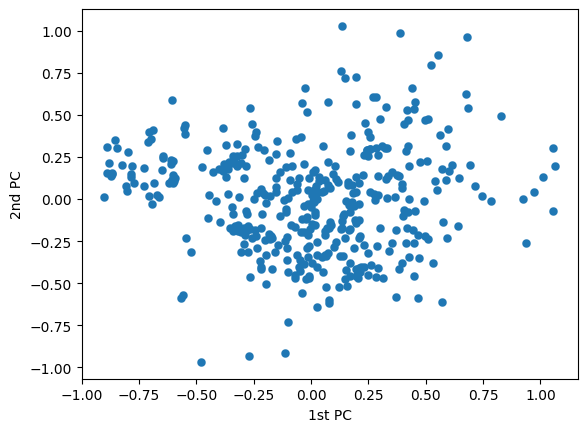

In [ ]:
projected_data = faces_centered.dot(top_2pc.T)

plt.scatter(projected_data[:,[0]], projected_data[:,[1]], linewidths = 0.1)
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

<h3>2. Unroll PCA Write a function that takes each of the points in your data in PCA-space and projects
them back to dataspace. Write a function that compares the two data sets and compute the average difference
between them. Print out the result. Hint: this requires keeping track of the transformations applied to the
data an applying their inverse in reverse order.</h3>

<b>Write a function that takes each of the points in your data in PCA-space and projects
them back to dataspace.</b>

In [ ]:
#perform PCA using sklearn
from sklearn import decomposition
def project_unroll(data):
    mean = np.mean(data, axis=0)
    data_centered = data - mean
    pca = sklearn.decomposition.PCA(n_components=2)
    x = pca.fit_transform(data_centered) #projected data = dot(data, eigenvectors.T)
    
    reconstruct_centered = np.dot(x, pca.components_[:2,:])
    reconstruct = reconstruct_centered + mean
    return reconstruct

In [ ]:
#Since dataset is not specified, I made arbitrary numpy array
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print(X.shape)
print(project_unroll(X).shape)

print(X)
print(project_unroll(X))

(6, 2)
(6, 2)
[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[[-1. -1.]
 [-2. -1.]
 [-3. -2.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  2.]]


<b>Write a function that compares the two data sets and compute the average difference
between them. Print out the result</b>

In [ ]:
def compare_average(data1, data2):
    mean1 = np.mean(data1, axis=0)
    mean2 = np.mean(data2, axis=0)
    return mean2 - mean1

In [ ]:
A = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
B = np.array([[3, 1],[2, 4],[-3, 0],[0, 0],[1, 2],[3, 1]])

print(compare_average(A, B))

[1.         1.33333333]


<h3>3. Use the faces dataset to compare the distance matrix in pixel space versus the distance matrix in PCA space
(projected space).</h3>

<b>a) What would the ideal fit be?</b>

Ideally, distance matrix in pixel space and distance matrix in PCA will be almost identical. The data projected onto 1st PC (highest eigenvectors) will have the most similar distance values as the distance of original.

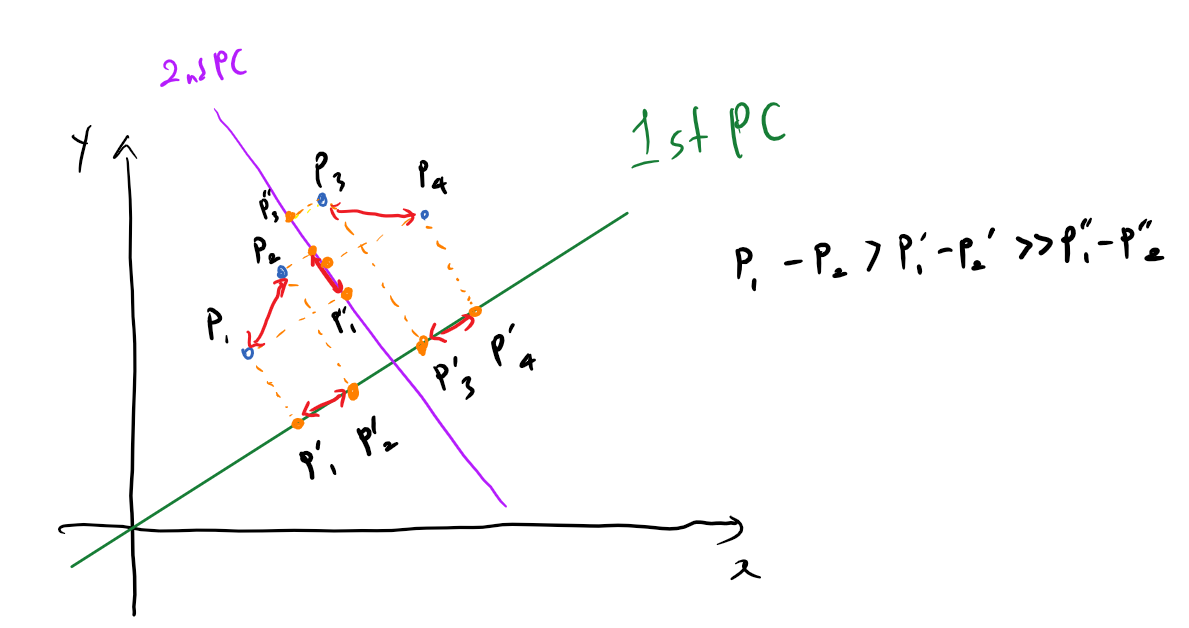

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

data = datasets.fetch_olivetti_faces().data
mean = np.mean(data, axis=0)
data_centered = data - mean
distance_mat_pixel = euclidean_distances(data_centered, data_centered) #used euclidean distance
print(distance_mat_pixel.shape)

pca = sklearn.decomposition.PCA(n_components=2)
projected_data = pca.fit_transform(data_centered)
distance_mat_pca = euclidean_distances(projected_data, projected_data)
print(distance_mat_pca.shape)

(400, 400)
(400, 400)


<b>b) Compute the average error?</b>

In [ ]:
error_pixel_pca = distance_mat_pixel - distance_mat_pca
avg_error_pca = np.mean(error_pixel_pca, axis=0)

print(avg_error_pca)

[4.9758782 5.945304  5.88223   2.6895995 6.4925203 4.6401963 5.235937
 4.9994698 5.403748  8.036322  6.787177  6.583206  6.705689  6.29732
 7.308663  6.1525073 6.7254767 6.5904775 6.20612   6.621332  5.257035
 5.34048   5.061666  5.6607103 5.5804234 7.1056933 5.3339314 5.0956426
 5.32112   5.5582566 6.0090566 6.0838943 6.1370473 4.559964  4.8344836
 4.18899   4.622263  6.047072  6.538599  5.006528  5.260684  5.3690467
 5.3449035 5.3376245 3.9086006 4.3398314 5.33641   5.5603557 4.498209
 4.3086767 5.053482  5.154645  5.0923634 4.034005  3.4905453 3.427273
 3.1451845 3.5113568 3.1645865 3.9435053 5.907385  7.3172255 6.064474
 6.439356  5.9618444 6.2483993 5.529072  5.137056  5.6695514 6.9049206
 6.190788  5.806399  5.2421794 4.362983  4.447118  4.169987  4.2125707
 5.0915103 5.342695  5.126053  5.946071  5.5343843 5.7527986 5.519422
 5.9014087 5.2660246 5.2657757 5.262892  5.9015365 5.8940797 6.689416
 6.3428135 5.4098554 5.579626  6.45357   6.9483275 6.436901  6.2178364
 4.786266  5.02

<b>c) What is the error in comparison to ideal?</b>

The error tells that the distance of two data points on PCA space has been modified slightly. Error will be the difference of two distances.

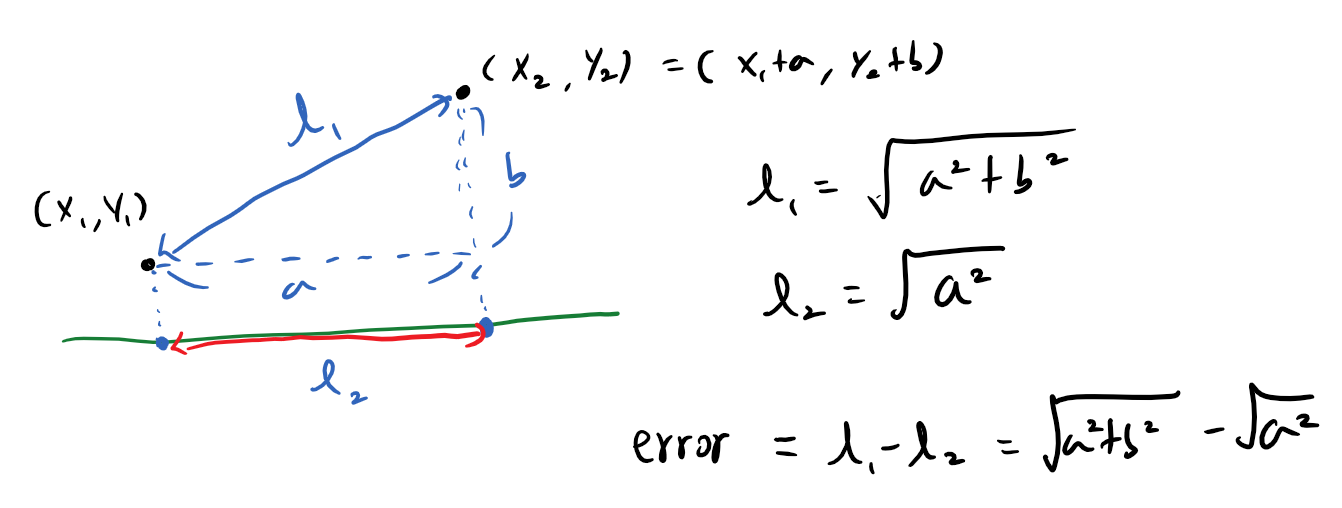

<b>d) Show a plot that compares them.</b>

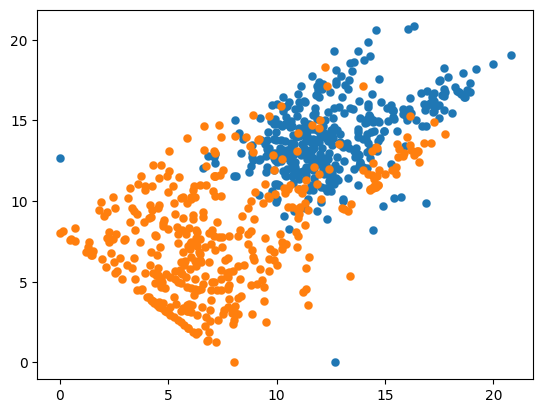

In [ ]:
import matplotlib.pyplot as plt

mean_pixel = np.mean(distance_mat_pixel, axis=0)
mean_pca = np.mean(distance_mat_pca)

plt.scatter(distance_mat_pixel[0], distance_mat_pixel[1], linewidths = 0.1)
plt.scatter(distance_mat_pca[0], distance_mat_pca[1], linewidths = 0.1)
plt.show()

<h3>4. Use the faces dataset to compare the distance in pixel space versus those in projection space using MDS. You
may use the MDS library from scikit-learn.</h3>

<b>a) What would the ideal fit be?</b>

Ideally, distance matrix in pixel space and distance matrix in MDS will be almost identical.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS

data = datasets.fetch_olivetti_faces().data
mean = np.mean(data, axis=0)
data_centered = data - mean
distance_mat_pixel = euclidean_distances(data_centered, data_centered)
print(distance_mat_pixel.shape)

mds = MDS(n_components=2, random_state=0)
data_mds = mds.fit_transform(data)
distance_mat_mds = euclidean_distances(data_mds, data_mds)
print(distance_mat_mds.shape)

(400, 400)
(400, 400)


<b>b) Compute the average error?</b>

In [ ]:
#the error between two matrices will be the difference between two matices
error_pixel_mds = distance_mat_pixel - distance_mat_mds

average_error_mds = np.mean(error_pixel_mds, axis=0) #mean by each column of error matrix
print(average_error_mds)

[0.93036247 0.35128534 1.04095992 0.13580556 0.91977732 0.37128109
 0.89623695 0.7352661  0.66400729 0.71884268 2.34121753 1.29316585
 1.56314632 1.06479301 1.20211135 0.93720625 2.00285778 1.69127818
 0.67640034 2.24815912 2.0211913  1.70538593 1.8174487  1.69084275
 1.18963537 1.79827653 1.85834408 1.19537109 2.22273625 2.39537694
 2.78078423 2.38242156 2.43751525 1.71208773 2.01949145 0.75088603
 1.73921417 2.71747586 2.0794365  1.57484884 2.15316263 2.3337336
 2.15028846 2.21901929 0.85884089 1.19336196 2.26654822 1.91761243
 1.56355355 0.98033099 1.60864384 1.69189598 1.39656547 0.35469041
 0.27394819 0.26038444 0.22517417 0.31195013 0.20329613 0.28182238
 1.00283839 1.52845407 0.7632571  1.26264639 0.9139587  0.92938442
 0.66894716 0.7774112  0.55445117 0.76326785 0.36753827 0.2445576
 0.39153303 0.1290013  0.40103913 0.3197131  0.1666131  0.51018651
 0.19381524 0.69687007 2.37252141 2.14432321 2.12807469 2.40522475
 2.68711647 2.0249068  2.0477414  2.19840026 2.65571084 2.773633

<b>c) What is the error in comparison to ideal?</b>

The error tells that the distance of two data points on the projected space has been modified slightly. Error will be the difference of two distances.

<b>d) Show a plot that compares them.</b>

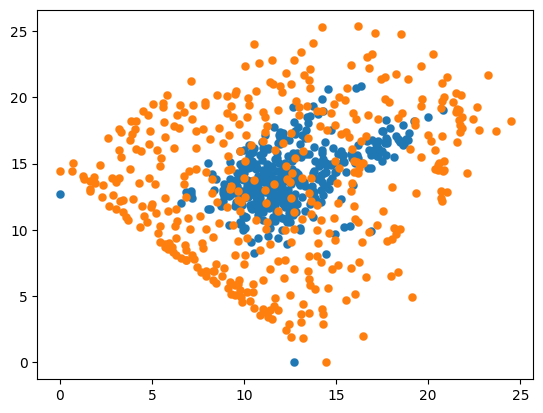

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(distance_mat_pixel[0], distance_mat_pixel[1], linewidths = 0.1)
plt.scatter(distance_mat_mds[0], distance_mat_mds[1], linewidths = 0.1)
plt.show()